In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('weath.csv')

#df = pd.read_csv("weather.csv", skiprows=6, sep=";", skipinitialspace=True, parse_dates=["Местное время в Майкопе (аэропорт)"])
#df.rename(columns={'Местное время в Майкопе (аэропорт)': 'Time'}, inplace=True)

#'''
df = df.drop(['P','Pa','ff10','ff3','N','WW','W1','W2','Tn','Tx','Cl','Nh','H','Cm','Ch','VV','Td','tR','E','Tg','E\'','sss'],axis=1)

le = LabelEncoder()
le.fit(df['DD'])
df['DD'] = le.transform(df['DD'])

df.loc[(df.RRR == 'Осадков нет'), 'RRR'] = 0.0
df.loc[(df.RRR == 'Следы осадков'), 'RRR'] = 0.0

df['RRR'] = df['RRR'].fillna(df['RRR'].median())

df["RRR"] = pd.to_numeric(df["RRR"], downcast="float")
#'''

df.head()

,Time,T,Po,U,DD,Ff,RRR
0,31.01.2022 21:00,1.0,739.3,92,14,1,0.0
1,31.01.2022 18:00,3.5,738.5,84,13,4,0.0
2,31.01.2022 15:00,6.5,736.8,64,5,4,0.0
3,31.01.2022 12:00,6.6,737.2,66,13,4,0.0
4,31.01.2022 09:00,2.0,737.2,84,0,1,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    248 non-null    object 
 1   T       248 non-null    float64
 2   Po      248 non-null    float64
 3   U       248 non-null    int64  
 4   DD      248 non-null    int64  
 5   Ff      248 non-null    int64  
 6   RRR     248 non-null    float32
dtypes: float32(1), float64(2), int64(3), object(1)
memory usage: 12.7+ KB


            T        Po         U        DD        Ff       RRR
T    1.000000 -0.407539 -0.644019  0.094679  0.324068 -0.149516
Po  -0.407539  1.000000  0.237777 -0.043585 -0.347565 -0.056571
U   -0.644019  0.237777  1.000000 -0.251784 -0.446191  0.209291
DD   0.094679 -0.043585 -0.251784  1.000000 -0.091662 -0.016385
Ff   0.324068 -0.347565 -0.446191 -0.091662  1.000000  0.009826
RRR -0.149516 -0.056571  0.209291 -0.016385  0.009826  1.000000


<AxesSubplot:>

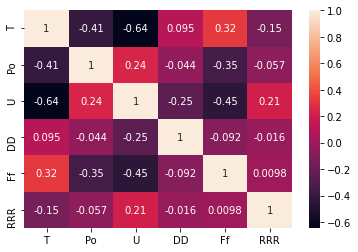

In [5]:
numeric_col = ['T','Po','U','DD','Ff','RRR']

corr_matrix = df.loc[:,numeric_col].corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True)

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
T,248.0,1.931452,5.052684,-9.3,-1.500,0.8,5.225,18.1
Po,248.0,741.657258,4.007355,727.8,739.075,742.0,744.700,749.1
U,248.0,79.508065,16.904589,31.0,70.000,84.0,93.000,99.0
DD,248.0,8.681452,5.180091,0.0,4.000,8.0,14.000,16.0
Ff,248.0,2.092742,1.421163,0.0,1.000,2.0,3.000,7.0
RRR,248.0,0.288306,1.150703,0.0,0.000,0.0,0.000,9.0


array([[<AxesSubplot:title={'center':'T'}>,
        <AxesSubplot:title={'center':'Po'}>],
       [<AxesSubplot:title={'center':'U'}>,
        <AxesSubplot:title={'center':'DD'}>],
       [<AxesSubplot:title={'center':'Ff'}>,
        <AxesSubplot:title={'center':'RRR'}>]], dtype=object)

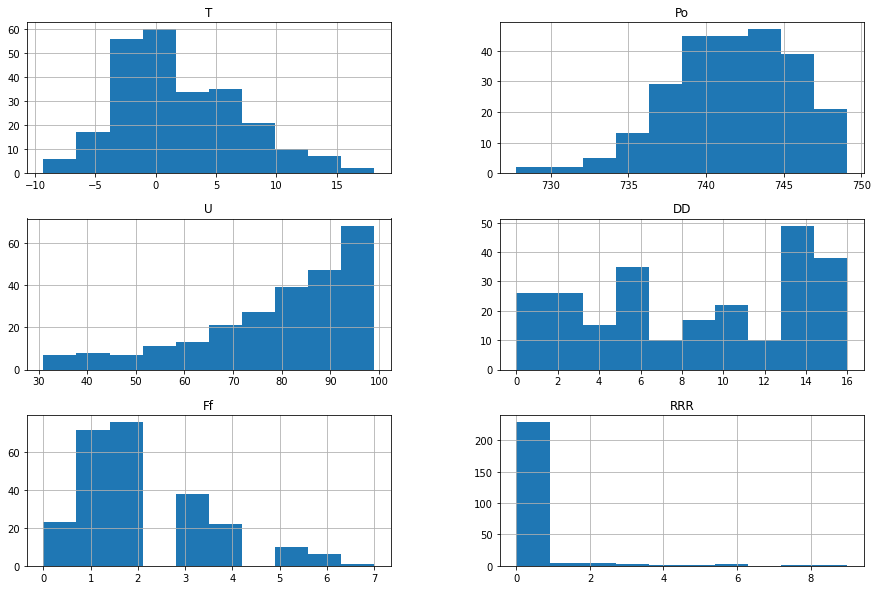

In [14]:
df[ ['T', 'Po', 'U', 'DD', 'Ff', 'RRR'] ].hist(figsize=(15,10))

In [5]:
le = LabelEncoder()
df['Po'] = le.fit_transform(df['Po'])
df['U'] = le.fit_transform(df['U'])
df.to_csv('weather.csv',index=False)

x_train, x_test, y_train, y_test = train_test_split(df[['T', 'Po', 'U', 'DD', 'RRR']], df['Ff'], test_size=0.3, random_state=1)

In [6]:
std = StandardScaler()
df['DD'] = pd.DataFrame(std.fit_transform(df[['DD']]))
df.head(10)

,Time,T,Po,U,DD,Ff,RRR
0,31.01.2022 21:00,1.0,40,52,1.028805,1,0.0
1,31.01.2022 18:00,3.5,32,44,0.835368,4,0.0
2,31.01.2022 15:00,6.5,22,26,-0.712130,4,0.0
3,31.01.2022 12:00,6.6,24,28,0.835368,4,0.0
4,31.01.2022 09:00,2.0,24,44,-1.679316,1,0.0
5,31.01.2022 06:00,-1.2,21,45,-0.131818,1,0.0
6,31.01.2022 03:00,0.1,23,40,0.641931,2,0.0
7,31.01.2022 00:00,0.0,28,42,1.028805,2,0.0
8,30.01.2022 21:00,-0.5,35,54,0.641931,1,0.0
9,30.01.2022 18:00,1.5,43,50,-0.131818,1,0.0


0.36480709962737967
[-0.00157034 -0.01081055 -0.03773017 -0.05932641  0.11836545]
4.717056474819241


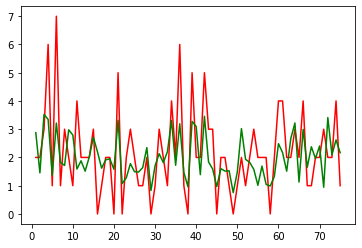

In [7]:
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_test, y_test))
print(reg.coef_)
print(reg.intercept_)

reg.predict(x_test)

fig, ax = plt.subplots()

plt.rcParams['figure.figsize'] = [5, 3]

ax.plot(range(1,len(y_test)+1), y_test, 'r-', range(1,len(y_test)+1), reg.predict(x_test), 'g-')

plt.show()

{'max_depth': 3, 'min_samples_leaf': 11}
0.348792746935604
0.22848614012724502


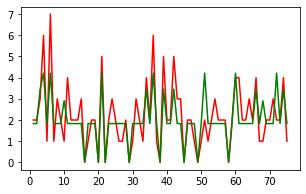

In [8]:
params = {'max_depth' : np.arange(1,15,1), 'min_samples_leaf' : range(1,15,1)} # Словарь с гиперпараметрами
clf = tree.DecisionTreeRegressor(random_state=1)
grid_clf = GridSearchCV(clf, params, cv=5, n_jobs=-1) #cv - кроссвалидация

grid_clf.fit(x_train, y_train)

print(grid_clf.best_params_)
best_cls = grid_clf.best_estimator_

y_pred = best_cls.predict(x_test)
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test, y_pred))
print(grid_clf.best_score_)

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [5, 3]
ax.plot(range(1,len(y_test)+1), y_test, 'r-', range(1,len(y_test)+1), best_cls.predict(x_test), 'g-')

plt.show()

In [10]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500, solver='lbfgs').fit(x_train, y_train)
print(regr.predict(x_test))
print(regr.score(x_test, y_test))

[ 2.00829472  1.18488457  3.4646764   4.39991696  1.5312138   7.11493617
  1.88308874  1.53424384  2.50109376  2.16247919  2.06576377  2.21192825
  1.69675138  0.32483612  2.66019438  2.43771829  2.0286882   2.28782163
  2.06864711  0.03648093  5.79830304  0.70364805  1.48977875  1.54289401
  1.79824544  1.86907347  0.91140341  2.0974206  -0.34972489  1.10180569
  2.08242297  1.74296264  1.83173202  1.80225295  2.28452447  2.96163987
  2.12999842  1.05070349  3.6844549   1.58782745  2.18586929  4.87817863
  2.08250439  1.70613585  1.06470476  1.85978754  1.87357279  1.93095268
  0.359112    2.22398678  5.9094856   1.21871466  1.46990511  1.92128797
  1.40231359  1.8924735   1.17280254  1.31222534  1.50084442  3.46070043
  2.49328477  1.63957467  2.27269211  2.49835558  1.33101571  2.12768606
  2.09349938  2.34251359  1.38443213  2.12437822  0.78518673  6.22947566
  2.03543942  2.65297015  2.04808147]
0.3318357312106518


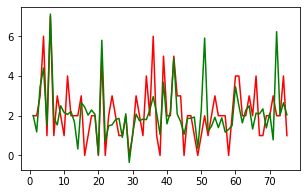

In [11]:
fig, ax = plt.subplots() #8 5
plt.rcParams['figure.figsize'] = [5, 3]
ax.plot(range(1,len(y_test)+1), y_test, 'r-', range(1,len(y_test)+1), regr.predict(x_test), 'g-')

plt.show()

In [92]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# data iformation
input_dim = 12 # number of input features
number_of_classes = 3 # number of classes
ml_task = "multiclass_classification" # task that we are going to solve
# initial hyperparameters
dense_1_size = 5
dense_2_size = 16
learning_rate = 0.05

# define model architecture
model = keras.Sequential()
model.add(layers.Dense(dense_1_size, activation="relu", input_dim=input_dim))
model.add(layers.Dense(dense_2_size, activation="relu"))
model.add(layers.Dense(1))

# compile the model
opt = keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss="mean_squared_error")
    
# X and y are training data
batch_size = min(200, x_train.shape[0])
epochs = 500
      
# set callbacks
es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=0, patience=10)
mc = tf.keras.callbacks.ModelCheckpoint(
    "best_model.h5",
    monitor="val_loss",
    mode="min",
    verbose=0,
    save_best_only=True,
)

model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    batch_size=batch_size,
    epochs=500,
    verbose=False,
    callbacks=[es, mc],
)

ValueError: Error when checking input: expected dense_114_input to have shape (12,) but got array with shape (5,)

In [33]:
#matplotlib inline
import numpy as np # linear algebra
import seaborn as sns
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import sklearn
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

allscatter = sns.pairplot(admission_prediction)

fig = plt.figure(figsize=[15,10])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(admission_prediction['GRE_Score'], admission_prediction['TOEFL_Score'], admission_prediction['Chance_of_Admit'], c='r', marker='o', alpha=1)
ax.set_xlabel('GRE_Score')
ax.set_ylabel('TOEFL_Score')
ax.set_zlabel('Chance_of_Admit')
plt.show()

corr = admission_prediction2.corr()
fig = plt.figure(figsize=[15,10])
sns.heatmap(corr)

admission_prediction.GRE_Score = admission_prediction.GRE_Score.astype(float)
admission_prediction.TOEFL_Score = admission_prediction.TOEFL_Score.astype(float)
admission_prediction.University_Rating = admission_prediction.University_Rating.astype(float)

x = admission_prediction.GRE_Score.tolist()
y = admission_prediction.Chance_of_Admit.tolist()

def linearregression():
  x1 = tf.placeholder(tf.float32, shape=(None, ), name='x')
  y1 = tf.placeholder(tf.float32, shape=(None, ), name='y')

  with tf.variable_scope('lreg') as scope:
    w = tf.Variable(np.random.normal(), name='W')
    b = tf.Variable(np.random.normal(), name='b')
    y_pred = tf.add(tf.multiply(w, x1), b)
    loss = tf.reduce_mean(tf.square(y_pred - y1))

  return x1, y1, y_pred, loss

def run():
  x1, y1, y_pred, loss = linearregression()

  optimizer = tf.train.GradientDescentOptimizer(0.000005)
  train_op = optimizer.minimize(loss)

  with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    feed_dict = {x1: x, y1: y}

    for i in range(1700):
      session.run(train_op, feed_dict)
      print(i, "loss:", loss.eval(feed_dict))
      
    y_pred_batch = session.run(y_pred, {x1 : x})
    plt.scatter(x, y)
    plt.plot(x, y_pred_batch, color='red')
    
run()

NameError: name 'admission_prediction' is not defined

In [4]:
# Загрузить библиотеки
from sklearn import preprocessing
import numpy as np
import pandas as pd

# Создать признак
features = np.array([[-100.1, 3240.1],
                     [-200.2, -234.1],
                     [5000.5, 150.1],
                     [6000.6, -125.1],
                     [9000.9, -673.1]])

# Создать шкалировщик
scaler = preprocessing.StandardScaler()

# Преобразовать признак
features_standardized = scaler.fit_transform(features)

# Показать признак
features_standardized




array([[-1.12541308,  1.96429418],
       [-1.15329466, -0.50068741],
       [ 0.29529406, -0.22809346],
       [ 0.57385917, -0.42335076],
       [ 1.40955451, -0.81216255]])

In [6]:
from sklearn import preprocessing
from keras import models
from keras import layers

# Инициализировать нейронную сеть
network = models.Sequential()

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu", input_shape=(10,)))

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu"))

# Добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(units=1, activation="sigmoid"))

# Скомпилировать нейронную сеть
network.compile(
loss="binary_crossentropy", # Перекрестная энтропия
optimizer="rmsprop", # Распространение среднеквадратической ошибки
metrics=["accuracy"]) # Точностный показатель результативности


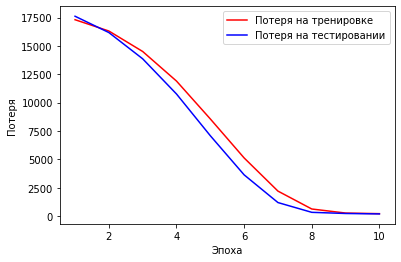

In [9]:
# Загрузить библиотеки
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Задать начальное значение для ГПСЧ
np.random.seed(0)

# Сгенерировать матрицу признаков и вектор целей
features, target = make_regression(n_samples = 10000,
                                   n_features = 3,
                                   n_informative = 3,
                                   n_targets = 1,
                                   noise = 0.0,
                                   random_state = 0)

# Разделить данные на тренировочный и тестовый наборы
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.33, random_state=0)

# Инициализировать нейронную сеть
network = models.Sequential()

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
units=32,
activation="relu",
input_shape=(features_train.shape[1],)))

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=32, activation="relu"))

# Добавить полносвязный слой без активационной функции
network.add(layers.Dense(units=1))

# Скомпилировать нейронную
network.compile(
    loss="mse", # Среднеквадратическая ошибка
    optimizer="RMSprop", # Оптимизационный алгоритм
    metrics=["mse"]) # Среднеквадратическая ошибка

# Натренировать нейронную сеть
history = network.fit(
    features_train, # Признаки
    target_train, # Вектор целей
    epochs=10, # Количество эпох
    verbose=0, # Вывода нет
    batch_size=100, # Количество наблюдений на пакет
    validation_data=(features_test, target_test)) # Тестовые данные

# Получить истории потерь на тренировочных и тестовых данных
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Создать счетчик количества эпох
epoch_count = range(1, len(training_loss) + 1)

# Визуализировать историю потери
plt.plot(epoch_count, training_loss, "r-")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Потеря на тренировке", "Потеря на тестировании"])
plt.xlabel("Эпоха")
plt.ylabel("Потеря")
plt.show();

In [ ]:
# Загрузить библиотеки
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers

# Задать начальное значение для ГПСЧ
np.random.seed(0)

# Задать желаемое количество признаков
number_of_features = 10000

# Загрузить данные и вектор целей из набора данных IMDB о кинофильмах
(data_train, target_train), (data_test, target_test) = imdb.load_data(num_words=number_of_features)

# Конвертировать данные IMDB о кинофильмах

# в матрицу признаков в кодировке с одним активным состоянием
tokenizer = Tokenizer(num_words=number_of_features)
features_train = tokenizer.sequences_to_matrix(data_train, mode="binary")
features_test = tokenizer.sequences_to_matrix(data_test, mode="binary")

# Инициализировать нейронную сеть
network = models.Sequential()

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(
    units=16,
    activation="relu",
    input_shape=(number_of_features,)))

# Добавить полносвязный слой с активационной функцией ReLU
network.add(layers.Dense(units=16, activation="relu"))

# Добавить полносвязный слой с сигмоидальной активационной функцией
network.add(layers.Dense(units=1, activation="sigmoid"))

# Скомпилировать нейронную сеть
network.compile(
    loss="binary_crossentropy", # Перекрестная энтропия
    optimizer="rmsprop", # Распространение CKO
    metrics=["accuracy"]) # Точностный показатель результативности

# Натренировать нейронную сеть
history = network.fit(
    features_train, # Признаки
    target_train, # Вектор целей
    epochs=3, # Количество эпох
    verbose=0, # Вывода нет
    batch_size=100, # Количество наблюдений на пакет
    validation_data=(features_test, target_test)) # Тестовые данные

# Предсказать классы тестового набора
predicted_target = network.predict(features_test)

17473536/17464789 [==============================] - 93s 5us/step
